In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib widget

In [2]:


# Specify the path to your log file
log_file_path = "logs/trading_log_22.csv"  # Replace with your actual file path

# Load the log data into a pandas DataFrame
log_data = pd.read_csv(log_file_path)

# Ensure Timestamp column is in datetime format
log_data['Timestamp'] = pd.to_datetime(log_data['Timestamp'])

# Display the first few rows of the data to verify
# print(log_data.head())


In [4]:
log_data.columns

Index(['Timestamp', 'Close', 'Predicted Change', 'Predicted Value', 'EMA_5',
       'EMA_10', 'Target', 'Signal', 'Trade Action', 'Trade Price',
       'Position (BTC)', 'Balance', 'Actual Change', 'Scaled Close'],
      dtype='object')

In [3]:
nn = 10
log_data['Actual Change'] = (log_data['Close'].shift(nn) - log_data['Close']) / log_data['Close'] * 100

# Define the range for scaling based on Actual Change
target_min = log_data[['Actual Change', 'Predicted Change']].min().min()
target_max = log_data[['Actual Change', 'Predicted Change']].max().max()

# Scale Close to the same range as the target
close_min = log_data['Close'].min()
close_max = log_data['Close'].max()

log_data['Scaled Close'] = ((log_data['Close'] - close_min) / (close_max - close_min)) * (target_max - target_min) + target_min


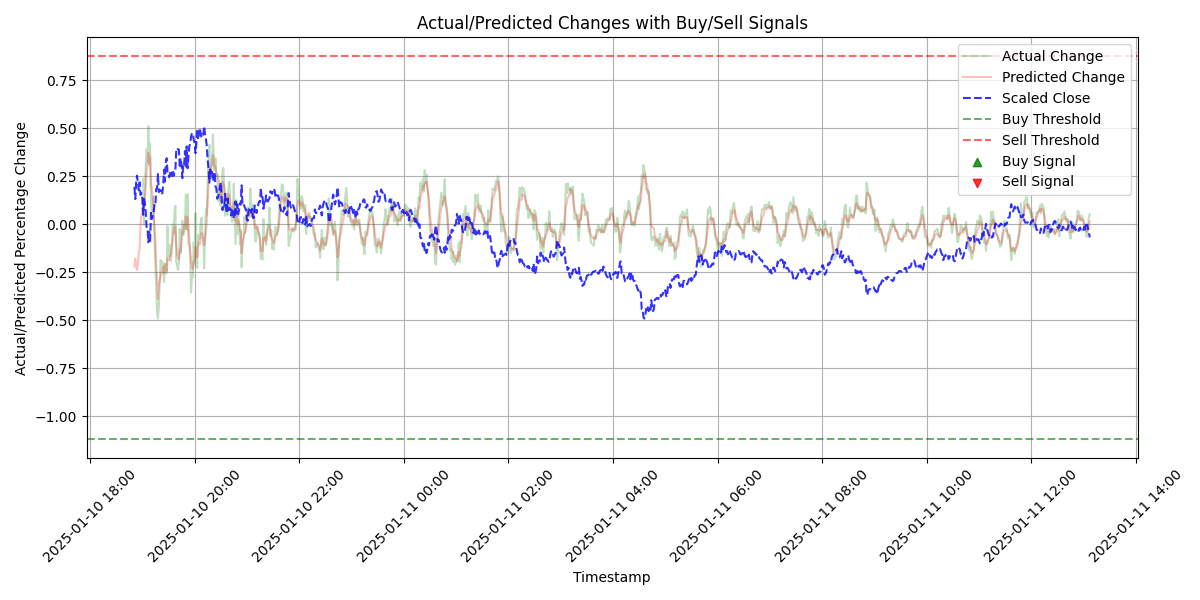

In [19]:
# Define buy & sell thresholds. Optimal thresholds were finalized after thorough grid-search 
sell_threshold = 0.8749999999999999 # 0.3751
buy_threshold =  -1.1169685935974183 # -0.2125565528869623

# Separate buy and sell signals for plotting
buy_signals = log_data[log_data['Trade Action'] == 'Buy']
sell_signals = log_data[log_data['Trade Action'] == 'Sell']

plt.clf()
plt.figure(figsize=(12, 6))

# Plot predicted percentage changes
plt.plot(log_data['Timestamp'], log_data['Actual Change'], label='Actual Change', color='green', alpha=0.25)
plt.plot(log_data['Timestamp'], -1*log_data['Predicted Change'], label='Predicted Change', color='red', alpha=0.25)
plt.plot(log_data['Timestamp'], log_data['Scaled Close'], label='Scaled Close', color='blue', linestyle='--', alpha=0.8)

# Add buy and sell thresholds
plt.axhline(y=buy_threshold, color='green', linestyle='--', label='Buy Threshold', alpha=0.6)
plt.axhline(y=sell_threshold, color='red', linestyle='--', label='Sell Threshold', alpha=0.6)

# Plot buy signals
plt.scatter(
    buy_signals['Timestamp'],
    buy_signals['Scaled Close'],
    color='green',
    marker='^',
    label='Buy Signal',
    alpha=0.8
)

# Plot sell signals
plt.scatter(
    sell_signals['Timestamp'],
    sell_signals['Scaled Close'],
    color='red',
    marker='v',
    label='Sell Signal',
    alpha=0.8
)

# Add labels, legend, and format the x-axis
plt.ylabel("Actual/Predicted Percentage Change")
plt.title("Actual/Predicted Changes with Buy/Sell Signals")
plt.legend()

plt.xlabel("Timestamp")
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.grid()

# Show plot
plt.show()

Swap all the logic

In [8]:
log_data[log_data['Trade Action'].isin(['Buy', 'Sell'])].head()

,Timestamp,Close,Predicted Change,Predicted Value,EMA_5,EMA_10,Target,Signal,Trade Action,Trade Price,Position (BTC),Balance,Actual Change,Scaled Close


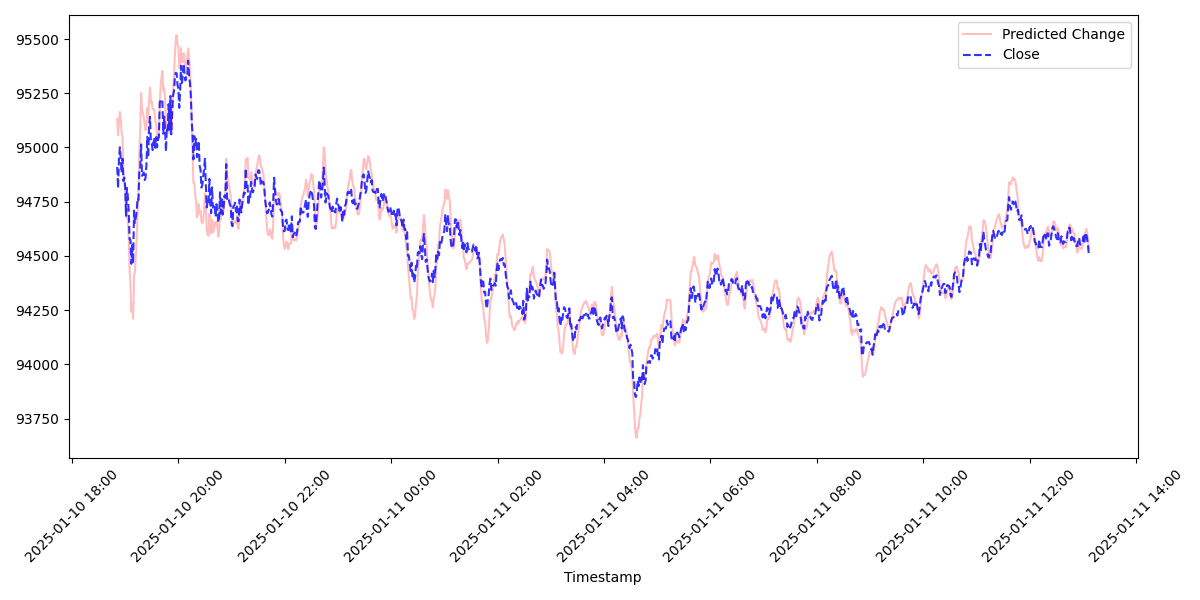

In [18]:
plt.clf()
plt.figure(figsize=(12, 6))

# Plot predicted percentage changes
plt.plot(log_data['Timestamp'], log_data['Predicted Value'], label='Predicted Change', color='red', alpha=0.25)
plt.plot(log_data['Timestamp'], log_data['Close'], label='Close', color='blue', linestyle='--', alpha=0.8)
plt.xlabel("Timestamp")
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()